<a href="https://www.kaggle.com/code/marwaelsherif/cnn-digit-recognizer?scriptVersionId=118599761" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [3]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y=train.iloc[:,:1]
x=train.iloc[:,1:]
print(len(x))


42000


In [7]:
x_image_array=x.to_numpy().reshape(42000,28,28)
len(x_image_array)
test_array=test.to_numpy()

In [8]:
test.to_numpy()
test.shape

(28000, 784)

In [9]:
x_image_array.shape , test_array.shape , y.shape

((42000, 28, 28), (28000, 784), (42000, 1))

label    1
Name: 0, dtype: int64


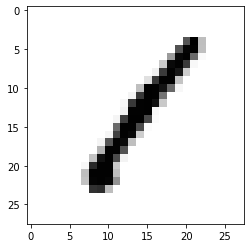

In [10]:
image_index = 0
print(y.iloc[image_index])
plt.imshow(x_image_array[image_index].reshape(28,28,1), cmap='Greys')

label    8
Name: 10, dtype: int64


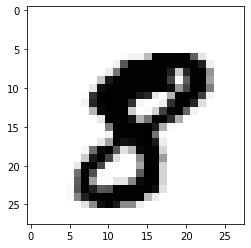

In [11]:
image_index = 10
print(y.iloc[image_index])
plt.imshow(x_image_array[image_index].reshape(28,28), cmap='Greys')

label    9
Name: 100, dtype: int64


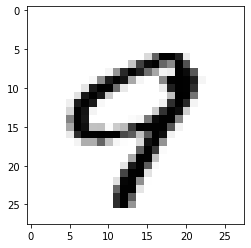

In [12]:
image_index = 100
print(y.iloc[image_index])
plt.imshow(x_image_array[image_index].reshape(28,28), cmap='Greys')

In [13]:
x=x_image_array.astype('float32')

In [14]:
type(x)

numpy.ndarray

# train_test_split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42, stratify=np.array(y))

In [16]:
x_train /=255
x_test /=255

In [17]:
len(x_train),len(x_test)

(31500, 10500)

In [18]:
x_train.reshape(31500,28,28,1)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [19]:
x_train=x_train.reshape(31500,28,28,1)

In [20]:
x_test=x_test.reshape(10500,28,28,1)

In [21]:
y_train.shape

(31500, 1)

In [22]:
x_train.shape

(31500, 28, 28, 1)

#  MODEL Selection

In [23]:
input_shape = (28,28,1)

In [24]:
import tensorflow.keras.layers as tfl
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    
    X = tfl.Conv2D (filters =32, kernel_size =3, padding ='same', activation='relu')(input_img)
    X = tfl.Conv2D (filters =32, kernel_size =3, padding ='same', activation='relu')(X)
    X = tfl.MaxPool2D(pool_size =2, strides =2, padding ='same')(X)
    X = tfl.BatchNormalization()(X)
    # 2nd Conv Block

    X = tfl.Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(X)
    X = tfl.Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(X)
    X = tfl.MaxPool2D(pool_size =2, strides =2, padding ='same')(X)
    X = tfl.BatchNormalization()(X)
    # 3rd Conv block

    X = tfl.Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(X)
    X = tfl.Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(X)
    X = tfl.Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(X)
    X = tfl.MaxPool2D(pool_size =2, strides =2, padding ='same')(X)
    X = tfl.BatchNormalization()(X)
    # 4th Conv block
    X = tfl.Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(X)
    X = tfl.Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(X)
    X = tfl.Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(X)
    X = tfl.MaxPool2D(pool_size =2, strides =2, padding ='same')(X)
    X = tfl.BatchNormalization()(X)

    # 5th Conv block

    X = tfl.Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(X)
    X = tfl.Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(X)
    X = tfl.Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(X)
    X = tfl.MaxPool2D(pool_size =2, strides =2, padding ='same')(X)
    X = tfl.BatchNormalization()(X)
    # Fully connected layers

    X = tfl.Flatten()(X)
    X = tfl.Dense(units = 256, activation ='relu')(X)
    X = tfl.BatchNormalization()(X)
    X = tfl.Dropout(0.4)(X)
    outputs = tfl.Dense(units=10, activation="softmax")(X)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)

    return model

In [25]:
conv_model = convolutional_model((28, 28, 1))

conv_model.compile(optimizer='adam', 
        loss='sparse_categorical_crossentropy', 
        metrics='accuracy')

2023-02-08 17:37:00.586338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 17:37:00.587237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 17:37:00.700963: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 17:37:00.701853: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 17:37:00.702588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [26]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# model = Sequential()
# model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(128, activation=tf.nn.relu))
# model.add(Dropout(0.3))
# model.add(Dense(10, activation=tf.nn.softmax))

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [27]:
conv_model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

2023-02-08 17:37:04.591926: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-02-08 17:37:07.002727: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


985/985 [==============================] - 21s 11ms/step - loss: 0.2174 - accuracy: 0.9343 - val_loss: 0.2375 - val_accuracy: 0.9306
Epoch 2/100
985/985 [==============================] - 11s 11ms/step - loss: 0.0973 - accuracy: 0.9715 - val_loss: 0.1026 - val_accuracy: 0.9755
Epoch 3/100
985/985 [==============================] - 10s 10ms/step - loss: 0.0718 - accuracy: 0.9794 - val_loss: 0.1077 - val_accuracy: 0.9690
Epoch 4/100
985/985 [==============================] - 10s 10ms/step - loss: 0.0659 - accuracy: 0.9817 - val_loss: 0.1254 - val_accuracy: 0.9691
Epoch 5/100
985/985 [==============================] - 11s 11ms/step - loss: 0.0554 - accuracy: 0.9850 - val_loss: 0.0720 - val_accuracy: 0.9838
Epoch 6/100
985/985 [==============================] - 10s 11ms/step - loss: 0.0537 - accuracy: 0.9859 - val_loss: 0.0615 - val_accuracy: 0.9851
Epoch 7/100
985/985 [==============================] - 10s 11ms/step - loss: 0.0486 - accuracy: 0.9875 - val_loss: 0.0430 - val_accuracy: 0.98

Predicted output: 4


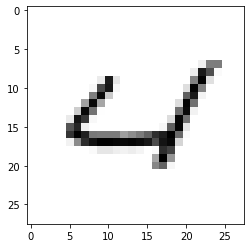

In [28]:
image_index = 100
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = conv_model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

# Model Testing

In [29]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
x=test.iloc[:,:]
print(len(x))


28000


In [31]:
x_test_arr=x.to_numpy().reshape(28000,28,28)

In [32]:
x=x_test_arr.astype('float32')

In [33]:
predictions = conv_model.predict(x)


In [34]:
print(predictions)

[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


In [35]:
pred = []
img_id = []
ix = 1
for i in range(len(test)):
    ans = np.argmax(predictions[i])
    pred.append(ans)
    img_id.append(ix)
    ix+=1
    

output = pd.DataFrame({'ImageId': img_id, 'Label': pred})
output.to_csv('submission.csv', index=False)



In [36]:
output.head()


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
